<a href="https://colab.research.google.com/github/The-good-guyy/C112.L21.KHCL-N8/blob/main/assignment3/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ĐỔI MỚI**

## ĐỀ BÀI

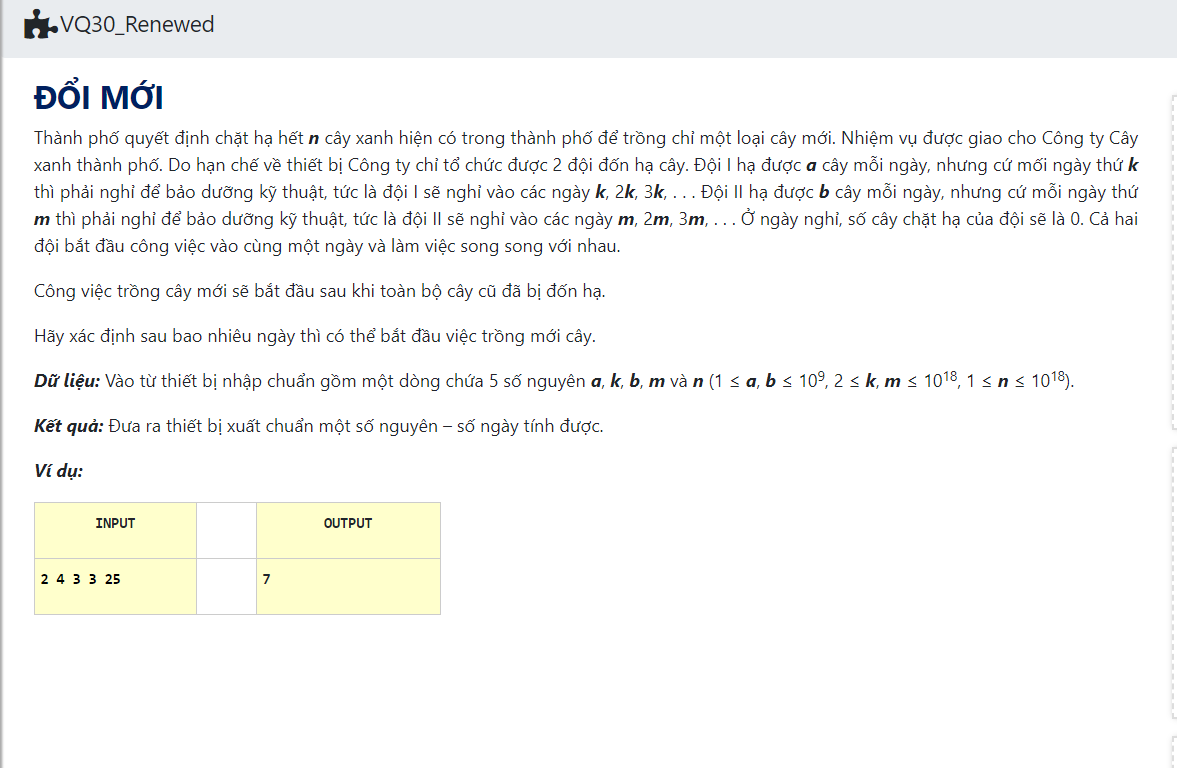

# **1. ABSTRACTION**

Nhập vào 5 số nguyên a, k, b, m, n($a >=1$ , $b =<10^9$, $k>=2$ , $ m=< 10^{18} $ , $1=<n=<10^{18}$ )

Tìm x nhỏ nhất sao cho: $x(a+b)-a(x//k)-b(x//m) >= n$

# **2. PATTERN RECOGNITION**

Thuật toán: Brute force với decomposition

Đặc điểm nhận dạng: bài toán bắt buộc phải kiểm tra từng ngày để xét điều kiện. Như vậy phải kiểm tra từng ngày tức là vét cạn và decomposition để chia nhỏ bài toán

# **3. ALGORITHM DESIGNED**

Chúng sẽ dùng phương pháp brute force vét qua từng ngày

In [ ]:
%%time
a,k,b,m,n=2,4,3,3,25
i=1
while n>0:
      n=n-a*(i%k!=0)-b*(i%m!=0)
      i+=1
print(i-1)

7
CPU times: user 512 µs, sys: 88 µs, total: 600 µs
Wall time: 458 µs


Tuy nhiên dùng phương pháp brute force không sẽ không hiệu quả.Điển hình như sau:

In [2]:
%%time
a,k,b,m,n=2,103,3,108,1000000000
i=1
while n>0:
      n=n-a*(i%k!=0)-b*(i%m!=0)
      i+=1
print(i-1)

201905799
CPU times: user 1min 18s, sys: 130 ms, total: 1min 18s
Wall time: 1min 18s


Thời gian chạy là hơn 1 phút

Nhưng chúng ta có thể cải thiện chúng bằng decomposition bằng cách cho số xuất phát 1 điểm gần hơn thay vì đoạn ban đầu.

Chúng ta sẽ tính bội chung nhỏ nhất của 2 số k, m

```
def gcd(a,b):
    if (b == 0):
        return a;
    return gcd(b, a % b)
lcm=(a*b)/gcd(a,b)
```
Bởi vì cứ sau 1 khoảng thời gian nhất định cả 2 đội sẽ reset lại ngày nghỉ thành 0 cùng lúc. Ngày nghỉ chính là mối bận tâm của chúng ta, nếu không có chúng chúng ta chỉ việc đơn giản lấy n chia cho $a$ và $b$ nhưng chính ngày nghỉ ép buộc chúng ta phải kiểm tra từng ngày. Và khoảng thời gian đó bằng bội chung nhỏ nhất của $k$ và $m$. Tức là chúng ta sẽ bỏ qua kiểm tra những ngày này.


```
Lcm=(k*m)/gcd(k,m)
abstract=Lcm*(a+b)-(Lcm/k)*a-(Lcm/m)*b
d=int(n/abstract)
modulo=n-d*abstract
if modulo!=0:
  i=1
  while modulo >0:
    modulo=modulo-a*(i%k!=0)-b*(i%m!=0)
    i+=1
else:
  i=0
print(str(Lcm*d+i-1))
```
Và vẫn còn 1 cách khác để rút ngắn điểm xuất phát. Ta có $n$ là tổng số cây cần đốn hạ, a và b lần lượt là số lượng cây mà mỗi đội đốn trong 1 ngày Nếu 2 đội làm việc mỗi ngày, không có ngày nghỉ, thì cần tối thiểu $y = n//(a+b)$ ngày để đốn hết số cây. Đó là nếu không có ngày nghỉ tức là số ngày phải làm luôn phải lớn hơn $y$

```
i = int(n // (a + b))
n=n-i*(a+b)+a*(i//k)+b*(i//m)
i+=1
while modulo >0:
  modulo=modulo-a*(i%k!=0)-b*(i%m!=0)
  i+=1
print(i-1)
```
Kết hợp cả 2 lại ta có

```
Lcm=int((k*m)/gcd(k,m))
abstract=Lcm*(a+b)-int(Lcm//k)*a-int(Lcm//m)*b
d=int(n//abstract)
modulo=n-d*abstract
i = int(modulo // (a + b))
modulo=modulo-i*(a+b)+a*(i//k)+b*(i//m)
if i!=0:
  i+=1
while modulo >0:
  modulo=modulo-a*(i%k!=0)-b*(i%m!=0)
  i+=1
print(str(Lcm*d+i-1))
    
```








In [3]:
%%time
a,k,b,m,n=2,103,3,108,1000000000
def gcd(a,b):
    if (b == 0):
        return a;
    return gcd(b, a % b)
Lcm=int((k*m)/gcd(k,m))
abstract=Lcm*(a+b)-int(Lcm//k)*a-int(Lcm//m)*b
d=int(n//abstract)
modulo=n-d*abstract
i = int(modulo // (a + b))
modulo=modulo-i*(a+b)+a*(i//k)+b*(i//m)
if i!=0:
  i+=1
while modulo >0:
  modulo=modulo-a*(i%k!=0)-b*(i%m!=0)
  i+=1
print(str(Lcm*d+i-1))

201905799
CPU times: user 988 µs, sys: 0 ns, total: 988 µs
Wall time: 996 µs


Thời gian chạy dưới 1$ms$ nhanh hơn phương pháp trên hơn 1000 lần. Rõ ràng phương pháp nào hiệu quả hơn ai cũng thấy rõ

# **COMPLEXITY EVALUATE**

## Time complexity:


*   Phương thức brute force thuần: image.png
*   Phương thức thứ 2: image.png



# **PROGRAMMING**

In [4]:
%%time
a,k,b,m,n=2,4,3,3,25
def gcd(a,b):
    if (b == 0):
        return a;
    return gcd(b, a % b)
Lcm=int((k*m)/gcd(k,m))
abstract=Lcm*(a+b)-int(Lcm//k)*a-int(Lcm//m)*b
d=int(n//abstract)
modulo=n-d*abstract
i = int(modulo // (a + b))
modulo=modulo-i*(a+b)+a*(i//k)+b*(i//m)
if i!=0:
  i+=1
while modulo >0:
  modulo=modulo-a*(i%k!=0)-b*(i%m!=0)
  i+=1
print(str(Lcm*d+i-1))

7
CPU times: user 119 µs, sys: 0 ns, total: 119 µs
Wall time: 124 µs
